In [2]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 27.0 MB 7.0 MB/s            


In [3]:
import pandas as pd
import seaborn as sns
import 
%matplotlib inline

In [25]:
df = pd.read_csv("results_data.csv")

In [26]:
df = df[df.loss != 'loss']
print(df.loc[df['loss'] == 'loss'])

Empty DataFrame
Columns: [split_percentage, run, epoch, loss, train, valid, test, key]
Index: []


In [38]:
df[["epoch","loss", "train","valid","test"]] = df[["epoch","loss", "train","valid","test"]].apply(pd.to_numeric)

In [39]:
df[["loss", "train","valid","test"]] = df[["loss", "train","valid","test"]].astype('float')
df.head()

,split_percentage,run,epoch,loss,train,valid,test,key
0,20,01,1,1.3863,0.00,0.00,0.01,Hits@10
1,20,01,1,1.3863,0.01,0.01,0.01,Hits@20
2,20,01,1,1.3863,0.01,0.01,0.01,Hits@30
3,20,01,2,1.3861,0.09,0.04,0.02,Hits@10
4,20,01,2,1.3861,0.27,0.15,0.03,Hits@20


In [66]:
df_40 = df[df.split_percentage == '40']

df_40_hits_20 = df_40.loc[(df_40.key == 'Hits@20')]
df_40_hits_20.head()

# df_40_hits_20 = df_40_hits_20[::5]
df_40_hits_20.run = df_40_hits_20.run.apply(pd.to_numeric)
df_40_hits_20 = df_40_hits_20[(df_40_hits_20.key == 'Hits@20') & (df_40_hits_20.run == 1) ]

df_40_hits_20 = df_40_hits_20[::5]

/Users/leotisbuchanan/development/ai/training/udemy-linear-algebra-for-machine-learning/env/lib/python3.10/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


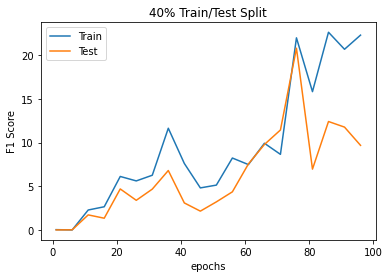

In [75]:
import matplotlib.pyplot as plt
# line 1 points
x1 = df_40_hits_20.epoch
y1 = df_40_hits_20.train
# plotting the line 1 points 
plt.plot(x1, y1, label = "Train")
# line 2 points
x2 = df_40_hits_20.epoch
y2 = df_40_hits_20.test
# plotting the line 2 points 
plt.plot(x2, y2, label = "Test")
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('F1 Score')
# Set a title of the current axes.
plt.title('40% Train/Test Split')
# show a legend on the plot
plt.legend()
plt.savefig('_40_Train_Test_Split.png')
# Display

In [73]:
df_80 = df[df.split_percentage == '80']

df_80_hits_20 = df_80.loc[(df_80.key == 'Hits@20')]
df_80_hits_20.head()

# df_40_hits_20 = df_40_hits_20[::5]
df_80_hits_20.run = df_80_hits_20.run.apply(pd.to_numeric)
df_80_hits_20 = df_80_hits_20[(df_80_hits_20.key == 'Hits@20') & (df_80_hits_20.run == 1) ]

df_80_hits_20 = df_80_hits_20[::5]

/Users/leotisbuchanan/development/ai/training/udemy-linear-algebra-for-machine-learning/env/lib/python3.10/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


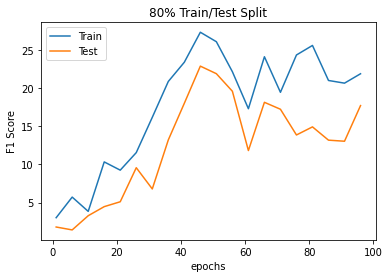

In [76]:
import matplotlib.pyplot as plt
# line 1 points
x1 = df_80_hits_20.epoch
y1 = df_80_hits_20.train
# plotting the line 1 points 
plt.plot(x1, y1, label = "Train")
# line 2 points
x2 = df_80_hits_20.epoch
y2 = df_80_hits_20.test
# plotting the line 2 points 
plt.plot(x2, y2, label = "Test")
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('F1 Score')
# Set a title of the current axes.
plt.title('80% Train/Test Split')
# show a legend on the plot
plt.legend()
plt.savefig('_80_Train_Test_Split.png')
# Display

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df_group =df.groupby(['run','split_percentage']).mean()

In [11]:
df_new = pd.DataFrame(df_group.to_records())

In [ ]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=df_new,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

/Users/leotisbuchanan/development/ai/training/udemy-linear-algebra-for-machine-learning/env/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


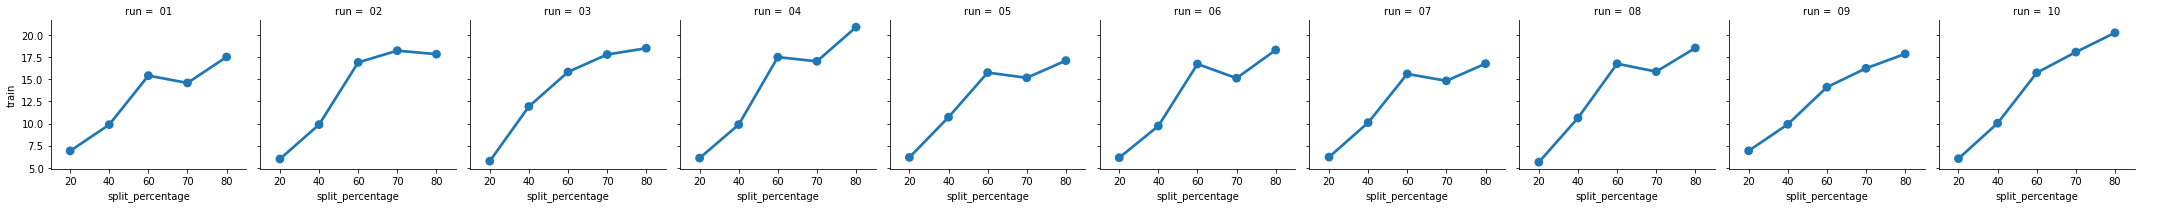

In [ ]:
g = sns.FacetGrid(df_new, col="run")
g.map(sns.pointplot, "split_percentage", "train", alpha=.7)
g.add_legend()

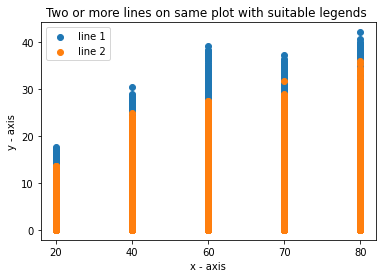

/home/rasta/development/ryerson-msc/machine-learning/final-project/ryerson-ml-final-project-fall-2021/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

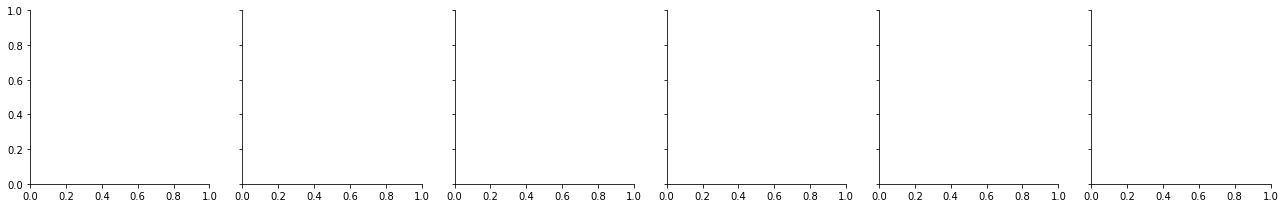

In [83]:
g = sns.FacetGrid(df, col="split_percentage")
g.map(sns.pointplot, "epoch", "train", alpha=.7)
g.add_legend()